<a href="https://colab.research.google.com/github/pepamengual/jupyter_bojos/blob/master/pele_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
import scipy

In [0]:
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 1I06_ethyl.csv to 1I06_ethyl.csv
Saving 1I06_isobutyl.csv to 1I06_isobutyl.csv
Saving 1I06_isopropyl.csv to 1I06_isopropyl.csv
Saving 1I06_methyl.csv to 1I06_methyl.csv
Saving 1I06_npropyl.csv to 1I06_npropyl.csv
Saving 1I06_secbutyl.csv to 1I06_secbutyl.csv


### Experimental binding energies

- #### secbutyl -8.82
- #### isobutyl -9.09
- #### npropyl -8.2
- #### isopropyl -7.85
- #### ethyl -6.96
- #### methyl -5.64



In [0]:
experimental_values = {"secbutyl": -8.82, "isobutyl": -9.09, "npropyl": -8.2, "isopropyl": -7.85, "ethyl": -6.96, "methyl": -5.64}

In [0]:
pdb_name = "1I06"
ligand_list = ["secbutyl", "isobutyl", "npropyl", "isopropyl", "ethyl", "methyl"]

In [0]:
def parse_files(ligand_list, pdb_name):
  data_parsed = {}  
  for ligand in ligand_list:
    filename = "{}_{}.csv".format(pdb_name, ligand)
    with open(filename, "r") as f:
      next(f)
      for line in f:
        line = line.rstrip().split(",")
        binding_energy = float(line[5])
        sasa = float(line[6])
        rmsd_core = float(line[7])
        data_parsed.setdefault(ligand, []).append(binding_energy) 
  return data_parsed

In [0]:
data_parsed = parse_files(ligand_list, pdb_name)

In [0]:
def get_first_quartile(data_parsed):
  first_quartile_data = {}
  for ligand, binding_energy_list in data_parsed.items():
    binding_energy_list_sorted = sorted(binding_energy_list, reverse=True)
    lenght_binding_energy_list = len(binding_energy_list_sorted)
    number_of_peptides_first_quartile = int(len(binding_energy_list_sorted) * 0.25)
    list_of_values_first_quartile = binding_energy_list_sorted[:number_of_peptides_first_quartile]
    mean_first_quartile = round(np.mean(list_of_values_first_quartile), 3)
    first_quartile_data.setdefault(ligand, mean_first_quartile)
  return first_quartile_data

In [0]:
first_quartile_data = get_first_quartile(data_parsed)

In [94]:
y = []
x = []
for ligand, value in sorted(experimental_values.items()):
  y.append(value)
for ligand, value in sorted(first_quartile_data.items()):
  x.append(value)
  
print(y, x)

[-6.96, -9.09, -7.85, -5.64, -8.2, -8.82] [-20.43, -26.502, -23.267, -17.232, -22.112, -25.696]


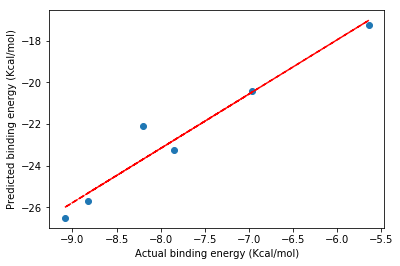

In [95]:
plt.plot(y, x, 'o')


z = np.polyfit(y, x, 1)
p = np.poly1d(z)
plt.plot(y,p(y),"r--")
plt.ylabel("Predicted binding energy (Kcal/mol)")
plt.xlabel("Actual binding energy (Kcal/mol)")
plt.show()

In [96]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(y, x)
r_squared = round(r_value**2, 2)
print("Correlation is {}".format(r_squared))

Correlation is 0.95
